In [1]:
from scipy.stats import bernoulli

In [2]:
# p is the Maximum Likelihood Estimator of the Random Dataset
p = 0.7
# generating the random dataset with MLE 0.7
data_set = bernoulli.rvs(p, size = 160)

In [3]:
# 1 denotes "heads" as the outcome of the experiment of tossing a coin
data_set

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1])

In [4]:
#BETA function for the distribution of mu
from scipy.special import gamma
def beta_func(x_param, a, b):
    return ((gamma(a+b)/(gamma(a)*gamma(b)))*((x_param)**(a-1))*((1-x_param)**(b-1)))

In [5]:
#LISA's Idea of taking the data set as a whole
totalheads = 0
totaltails = 0
for i in data_set:
    if(i == 1): 
        totalheads = totalheads+1
    else:
        totaltails = totaltails + 1

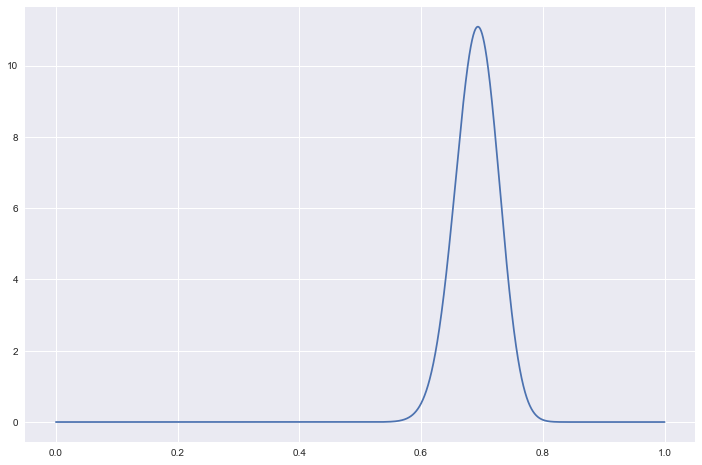

In [6]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (12,8)
mu = np.linspace(0,1,5000)
plt.plot(mu,beta_func(mu, 2+totalheads, 3+totaltails))

In [7]:
cumulative_heads = []
no_heads = 0
for i in data_set:
    if(i == 1):
        no_heads = no_heads+1
    cumulative_heads.append(no_heads)

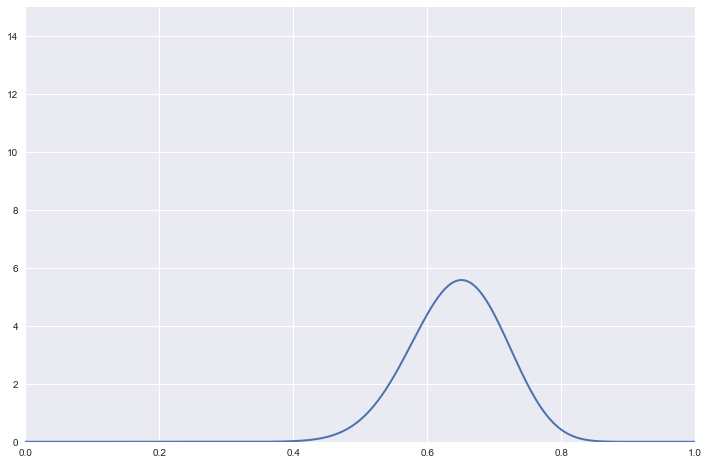

In [9]:
from matplotlib.animation import FuncAnimation
fig = plt.figure()
ax = plt.axes(xlim = (0,1), ylim=(0,15))
line, = ax.plot([],[],lw=2)
def init():
    line.set_data([],[])
    return line,

glb_cnt = 0
n = len(data_set)
def animate(i):
    global glb_cnt
    y = beta_func(mu, cumulative_heads[glb_cnt]+2, 
                  (glb_cnt+1)-cumulative_heads[glb_cnt]+3)
    line.set_data(mu, y)
    glb_cnt = glb_cnt+1
    if(glb_cnt == n):
        glb_cnt = 0
    return line,

anim = FuncAnimation(fig, animate, init_func = init, frames = 200, interval = 100, blit = True)
anim.save('plot_sequential_learning.gif', writer='pillow')